# Sobre o dataset
* https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce
* Este conjunto de dados é da  Olist, a maior loja de departamentos dos mercados brasileiros. O conjunto de dados contém informações de 100 mil pedidos de 2016 a 2018 feitos em vários marketplaces no Brasil.
* Serão utilizadas 3 das tabelas de dados para a segmentação de clientes

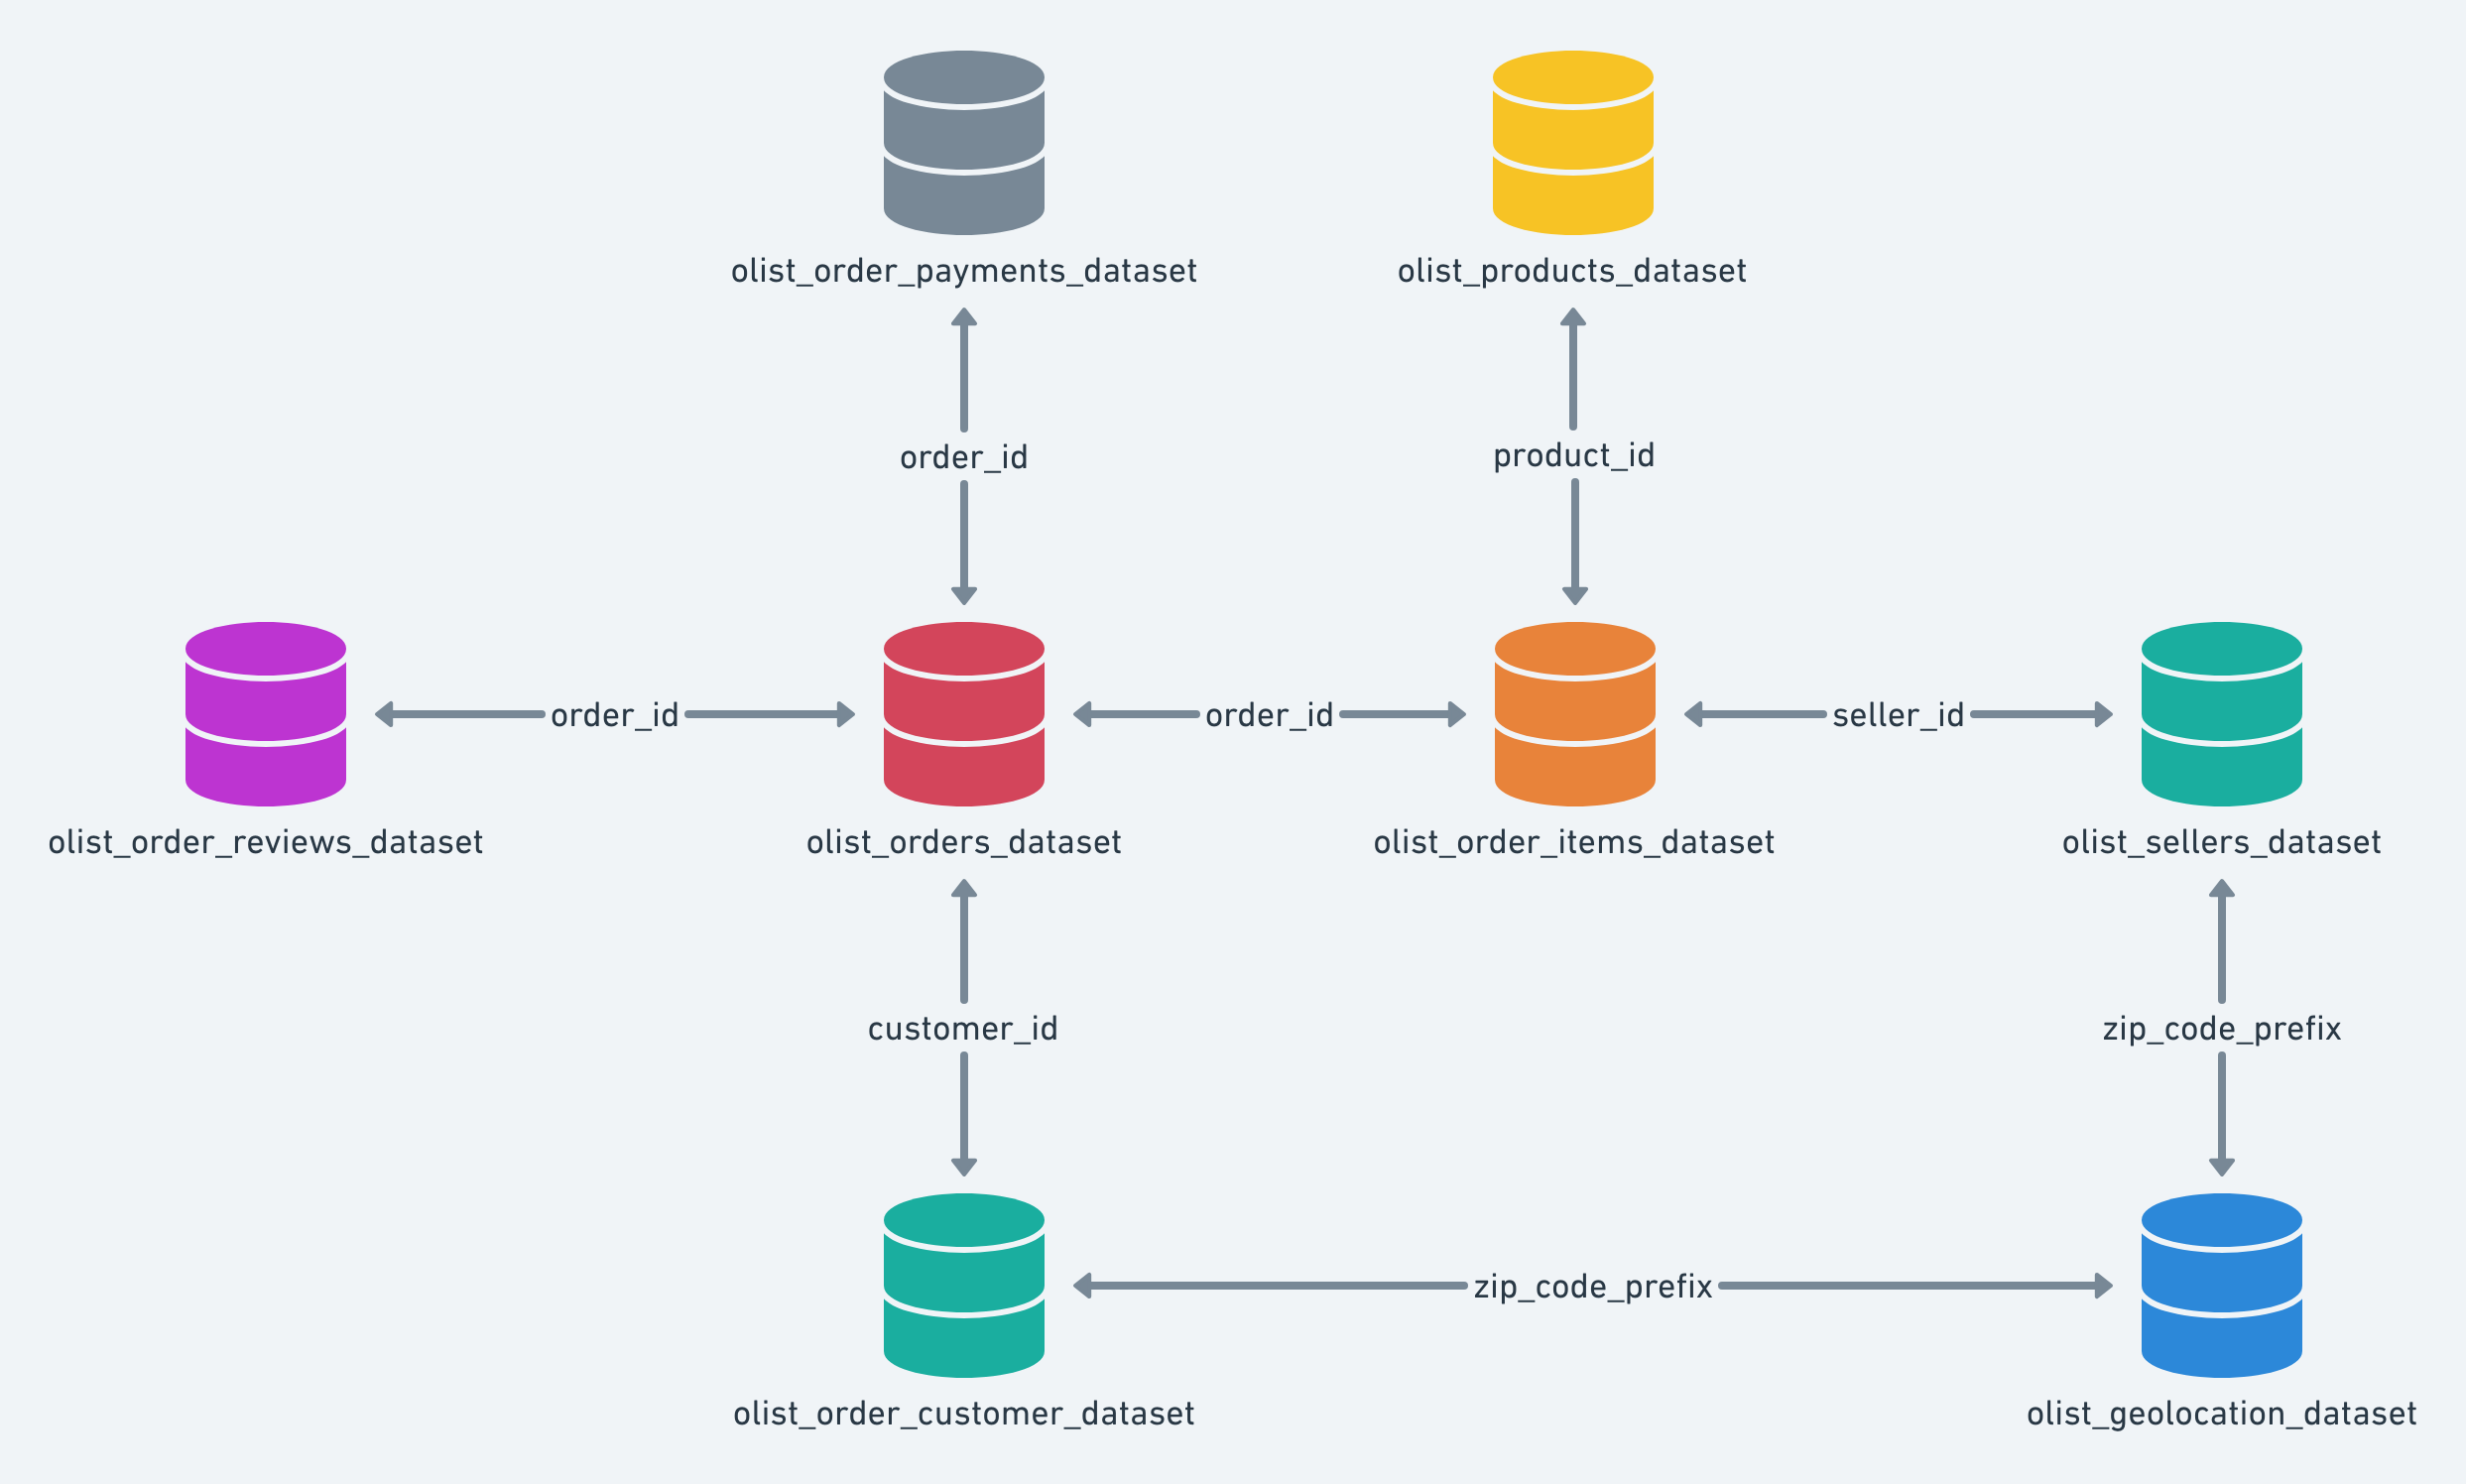

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import datetime
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans



# olist_customers_dataset
Dataset que contém o a identificação única de cada cliente

In [2]:
clientes_df = pd.read_csv('/content/olist_customers_dataset.csv')
print(clientes_df.head())

                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP  


In [3]:
print(clientes_df.size)
print(clientes_df['customer_id'].nunique())
print(clientes_df['customer_unique_id'].nunique())

497205
99441
96096


In [4]:
# não é o identificador real único
print(clientes_df['customer_id'].value_counts().head(15))

customer_id
274fa6071e5e17fe303b9748641082c8    1
e5ed7280cd1a3ac2ba29fd6650d8867c    1
c6ece8a5137f3c9c3a3a12302a19a2ac    1
821a7275a08f32975caceff2e08ea262    1
5eef6cce1f34954c9e7004332388ccc7    1
be631308cb609ff74d0e0fb54815e18c    1
a1b5ca506b592bb72d4caadcbfe71385    1
30c96385d694acb8aa2dc0df1770120b    1
b7c889215de76857c7967c1011125d2d    1
c156d63bdfce1d456bd43cf1c4dadfca    1
184e0c2cfc746789643521df0e9ff904    1
eabf770240659f7a6d09b11f12f10f89    1
6928be51d9496f1aab5da8f15a21aba6    1
6fb4f2354f36e554ac80141e9128f528    1
da37711b17efd5f2539e8196ab215f04    1
Name: count, dtype: int64


In [5]:
# analisando o customer_unique_id alguns clientes compraram mais de uma vez
print(clientes_df['customer_unique_id'].value_counts().head(15))

customer_unique_id
8d50f5eadf50201ccdcedfb9e2ac8455    17
3e43e6105506432c953e165fb2acf44c     9
ca77025e7201e3b30c44b472ff346268     7
1b6c7548a2a1f9037c1fd3ddfed95f33     7
6469f99c1f9dfae7733b25662e7f1782     7
f0e310a6839dce9de1638e0fe5ab282a     6
63cfc61cee11cbe306bff5857d00bfe4     6
12f5d6e1cbf93dafd9dcc19095df0b3d     6
de34b16117594161a6a89c50b289d35a     6
47c1a3033b8b77b3ab6e109eb4d5fdf3     6
dc813062e0fc23409cd255f7f53c7074     6
b4e4f24de1e8725b74e4a1f4975116ed     5
35ecdf6858edc6427223b64804cf028e     5
fe81bb32c243a86b2f86fbf053fe6140     5
56c8638e7c058b98aae6d74d2dd6ea23     5
Name: count, dtype: int64


# olist_orders_dataset
Contém informação da data dos pedidos

In [6]:
pedidos_df=pd.read_csv('/content/olist_orders_dataset.csv')
print(pedidos_df.head())

                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08

Unindo as tabelas de dados dos clientes com a de informações sobre os pedidos

In [7]:
pedidos_clientes = pd.merge(pedidos_df,clientes_df,on='customer_id')
pedidos_clientes.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


mantendo so as colunas relevantes

In [8]:
pedidos_clientes.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state'],
      dtype='object')

In [9]:
pedidos_clientes = pedidos_clientes[['order_id','order_purchase_timestamp', 'customer_id','customer_unique_id']]
pedidos_clientes.head()

,order_id,order_purchase_timestamp,customer_id,customer_unique_id
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,f88197465ea7920adcdbec7375364d82,7c142cf63193a1473d2e66489a9ae977
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,8ab97904e6daea8866dbdbc4fb7aad2c,72632f0f9dd73dfee390c9b22eb56dd6


# olist_order_payments_dataset
Dataset que contém as informções de pagamento

In [10]:
pagamentos_df = pd.read_csv('/content/olist_order_payments_dataset.csv')
pagamentos_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


Verificando se pedidos podem aparecer mais de uma vez por ter o método de pagamento separado.

In [11]:

print(pagamentos_df['order_id'].value_counts().head(15))

order_id
fa65dad1b0e818e3ccc5cb0e39231352    29
ccf804e764ed5650cd8759557269dc13    26
285c2e15bebd4ac83635ccc563dc71f4    22
895ab968e7bb0d5659d16cd74cd1650c    21
fedcd9f7ccdc8cba3a18defedd1a5547    19
ee9ca989fc93ba09a6eddc250ce01742    19
21577126c19bf11a0b91592e5844ba78    15
4bfcba9e084f46c8e3cb49b0fa6e6159    15
3c58bffb70dcf45f12bdf66a3c215905    14
4689b1816de42507a7d63a4617383c59    14
4fb76fa13b108a0d0478483421b0992c    13
cf101c3abd3c061ca9f78c1bbb1125af    13
73df5d6adbeea12c8ae03df93f346e86    13
465c2e1bee4561cb39e0db8c5993aafc    12
d744783ed2ace06cac647a9e64dcbcfd    12
Name: count, dtype: int64


Unificando, para que cada pedido só apareça uma única vez com o valor total da compra

In [12]:
summaries = {'payment_value':'sum'}

In [13]:
pagamentos_df = pagamentos_df.groupby('order_id').agg(summaries).reset_index()
pagamentos_df

,order_id,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,72.19
1,00018f77f2f0320c557190d7a144bdd3,259.83
2,000229ec398224ef6ca0657da4fc703e,216.87
3,00024acbcdf0a6daa1e931b038114c75,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,218.04
...,...,...
99435,fffc94f6ce00a00581880bf54a75a037,343.40
99436,fffcd46ef2263f404302a634eb57f7eb,386.53
99437,fffce4705a9662cd70adb13d4a31832d,116.85
99438,fffe18544ffabc95dfada21779c9644f,64.71


In [14]:
# agora cada pedido so aparece uma vez
print(pagamentos_df['order_id'].value_counts().head(15))

order_id
fff60e5408a9dd1e92ee30023052af30    1
fff3983dfa3c5a0d752d8d17baa406a0    1
fff2e9e3aa8644e19710216b4ef53ab2    1
fff2cdc825f9fc0ba3c04227cfa02303    1
fff1e3e76b816bfe8ef16678cc53c643    1
fff0db5573c78c1cb5a2b68a2bbd8d4a    1
ffefb169ddf34cecc0622a6d3cc387f8    1
ffef9e1de5dd07b397b373f9bb72cccf    1
ffef98cd5ecdc992fefbd967549520dd    1
ffeeb911d070bea3dd20bd5fd01da5e8    1
ffee31fb4b5e35c9123608015637c495    1
ffed7e90414c1477a6b92554661d465f    1
ffecd5a79a0084f6a592288c67e3c298    1
ffec1a6d35149778ec575d5048d44db8    1
ffebd80e3291e811c308365936897efd    1
Name: count, dtype: int64


Unindo o dataframe com dados pessoais, data dos pedidos ao dataframe de pagamento

In [15]:
pedidos_clientes = pd.merge(pagamentos_df,pedidos_clientes,on='order_id')
pedidos_clientes.head()

,order_id,payment_value,order_purchase_timestamp,customer_id,customer_unique_id
0,00010242fe8c5a6d1ba2dd792cb16214,72.19,2017-09-13 08:59:02,3ce436f183e68e07877b285a838db11a,871766c5855e863f6eccc05f988b23cb
1,00018f77f2f0320c557190d7a144bdd3,259.83,2017-04-26 10:53:06,f6dd3ec061db4e3987629fe6b26e5cce,eb28e67c4c0b83846050ddfb8a35d051
2,000229ec398224ef6ca0657da4fc703e,216.87,2018-01-14 14:33:31,6489ae5e4333f3693df5ad4372dab6d3,3818d81c6709e39d06b2738a8d3a2474
3,00024acbcdf0a6daa1e931b038114c75,25.78,2018-08-08 10:00:35,d4eb9395c8c0431ee92fce09860c5a06,af861d436cfc08b2c2ddefd0ba074622
4,00042b26cf59d7ce69dfabb4e55b4fd9,218.04,2017-02-04 13:57:51,58dbd0b2d70206bf40e62cd34e84d795,64b576fb70d441e8f1b2d7d446e483c5


In [16]:
pedidos_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99440 entries, 0 to 99439
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   order_id                  99440 non-null  object 
 1   payment_value             99440 non-null  float64
 2   order_purchase_timestamp  99440 non-null  object 
 3   customer_id               99440 non-null  object 
 4   customer_unique_id        99440 non-null  object 
dtypes: float64(1), object(4)
memory usage: 3.8+ MB


a data de compra não segue o modelo datetime, então isso vai ser alterado

In [17]:
pedidos_clientes['order_purchase_timestamp'] = pd.to_datetime(pedidos_clientes['order_purchase_timestamp']).dt.date

In [18]:
pedidos_clientes['order_purchase_timestamp']

,order_purchase_timestamp
0,2017-09-13
1,2017-04-26
2,2018-01-14
3,2018-08-08
4,2017-02-04
...,...
99435,2018-04-23
99436,2018-07-14
99437,2017-10-23
99438,2017-08-14


# Calculando métricas RFMT (RFM + Tenure)

A Análise de Segmentação RFM é uma técnica de segmentação de clientes baseada em dados, utilizada por empresas para compreender e categorizar seus clientes com base em seu histórico de compras.

RFM significa Recency, Frequency e Monetary value.

Este método visa segmentar os clientes com base em três componentes essenciais de seu histórico de compras:

• Recency (R): O tempo decorrido desde a última compra.

• Frequency (F): O número total de compras realizadas no passado.

• Monetary value (M): O valor total gasto.

RFMT (RFM + Tenure): Esta é uma variação onde "T" significa "Tempo de Fidelidade". Tenure refere-se ao tempo decorrido desde a primeira compra. Isso ajuda as empresas a identificar clientes fiéis e de longa data que podem não comprar com frequência, mas que estão com a empresa há muito tempo.

Essas métricas servem como indicadores confiáveis ​​para identificar e segmentar de forma eficiente diferentes segmentos de clientes para campanhas de marketing, com o objetivo de reter clientes valiosos, engajar os existentes e reconquistar aqueles que deixaram de comprar.

Primeiro verificando qual a data mais recente de compra, como o dataset não é algo que foi extraído nesse exato dia vai ser considerado como momento atual 1 dia após a data mais recente de compras

In [19]:
date_max= pedidos_clientes['order_purchase_timestamp'].max()
print(date_max)

2018-10-17


In [20]:
# a data mais recente é 2018-10-17, então vai ser considerado que essa análise foi feita em 2018-10-18,um dia após
snapshot_date = date_max + datetime.timedelta(days=1)
print(snapshot_date)

2018-10-18


Agrupando o dataset

In [21]:
pedidos_clientes.columns

Index(['order_id', 'payment_value', 'order_purchase_timestamp', 'customer_id',
       'customer_unique_id'],
      dtype='object')

In [22]:
summaries={
    # O quão recente é a última compra em dias e a quanto tempo o cliente compra
    'order_purchase_timestamp': [lambda x: (snapshot_date - x.max()).days, lambda x: (snapshot_date - x.min()).days],
    'order_id':'count' , # a frequência que o cliente compra
    'payment_value':'sum', # o quanto o cliente já gastou
}

In [23]:
olist_clients = pedidos_clientes.groupby('customer_unique_id').agg(summaries)
olist_clients

order_purchase_timestamp            order_id  \
                                               <lambda_0> <lambda_1>    count   
customer_unique_id                                                              
0000366f3b9a7992bf8c76cfdf3221e2                      161        161        1   
0000b849f77a49e4a4ce2b2a4ca5be3f                      164        164        1   
0000f46a3911fa3c0805444483337064                      587        587        1   
0000f6ccb0745a6a4b88665a16c9f078                      371        371        1   
0004aac84e0df4da2b147fca70cf8255                      338        338        1   
...                                                   ...        ...      ...   
fffcf5a5ff07b0908bd4e2dbc735a684                      497        497        1   
fffea47cd6d3cc0a88bd621562a9d061                      312        312        1   
ffff371b4d645b6ecea244b27531430a                      618        618        1   
ffff5962728ec6157033ef9805bacc48                      169        169        1   
ffffd2657e2aad2907e67c3e9daecbeb                      534        534        1   

                                 payment_value  
                                           sum  
customer_unique_id                              
0000366f3b9a7992bf8c76cfdf3221e2        141.90  
0000b849f77a49e4a4ce2b2a4ca5be3f         27.19  
0000f46a3911fa3c0805444483337064         86.22  
0000f6ccb0745a6a4b88665a16c9f078         43.62  
0004aac84e0df4da2b147fca70cf8255        196.89  
...                                        ...  
fffcf5a5ff07b0908bd4e2dbc735a684       2067.42  
fffea47cd6d3cc0a88bd621562a9d061         84.58  
ffff371b4d645b6ecea244b27531430a        112.46  
ffff5962728ec6157033ef9805bacc48        133.69  
ffffd2657e2aad2907e67c3e9daecbeb         71.56  

[96095 rows x 4 columns]

In [24]:
# simplificando o dataframe que agora possui colunas multi_level
olist_clients = olist_clients.droplevel(0,axis=1)
olist_clients

,<lambda_0>,<lambda_1>,count,sum
customer_unique_id,,,,
0000366f3b9a7992bf8c76cfdf3221e2,161,161,1,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,164,164,1,27.19
0000f46a3911fa3c0805444483337064,587,587,1,86.22
0000f6ccb0745a6a4b88665a16c9f078,371,371,1,43.62
0004aac84e0df4da2b147fca70cf8255,338,338,1,196.89
...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,497,497,1,2067.42
fffea47cd6d3cc0a88bd621562a9d061,312,312,1,84.58
ffff371b4d645b6ecea244b27531430a,618,618,1,112.46


Renomeando as colunas para nomes de métricas RFMT (RFM + Tenure)

In [25]:

olist_clients.rename(columns={'<lambda_0>':'Recency',
                             '<lambda_1>':'Tenure' ,
                             'count':'Frequency',
                             'sum':'MonetaryValue'},inplace=True)
olist_clients

,Recency,Tenure,Frequency,MonetaryValue
customer_unique_id,,,,
0000366f3b9a7992bf8c76cfdf3221e2,161,161,1,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,164,164,1,27.19
0000f46a3911fa3c0805444483337064,587,587,1,86.22
0000f6ccb0745a6a4b88665a16c9f078,371,371,1,43.62
0004aac84e0df4da2b147fca70cf8255,338,338,1,196.89
...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,497,497,1,2067.42
fffea47cd6d3cc0a88bd621562a9d061,312,312,1,84.58
ffff371b4d645b6ecea244b27531430a,618,618,1,112.46


# K means

O K means leva em consideração que as varíavels não são skewed

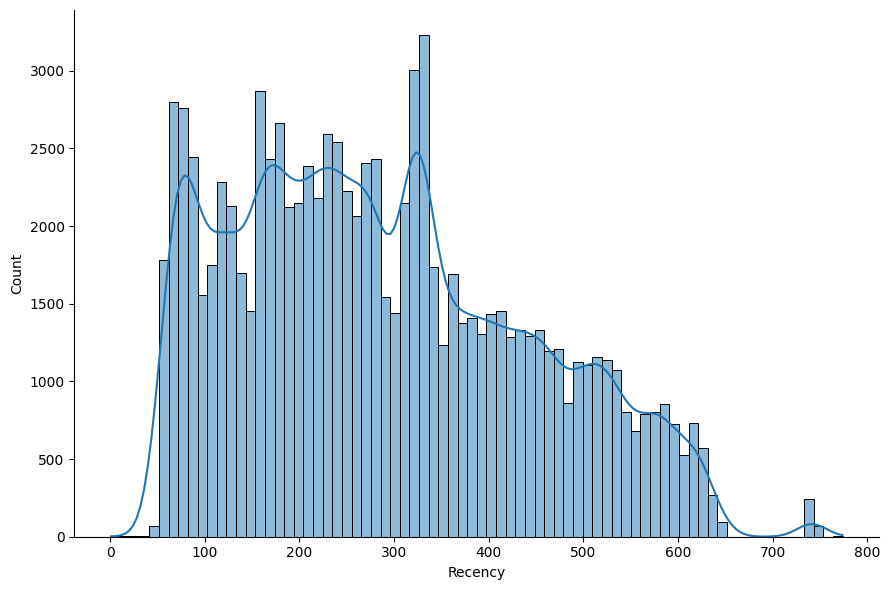

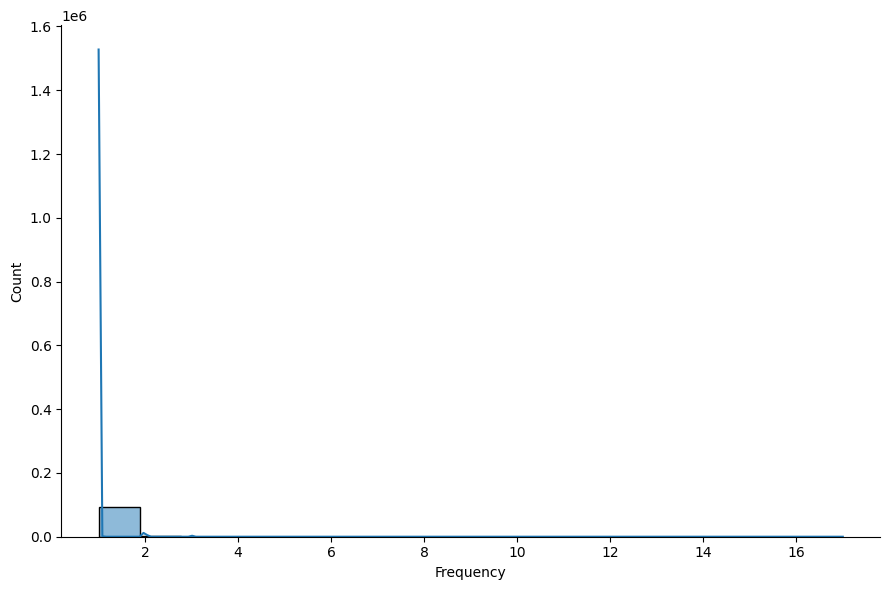

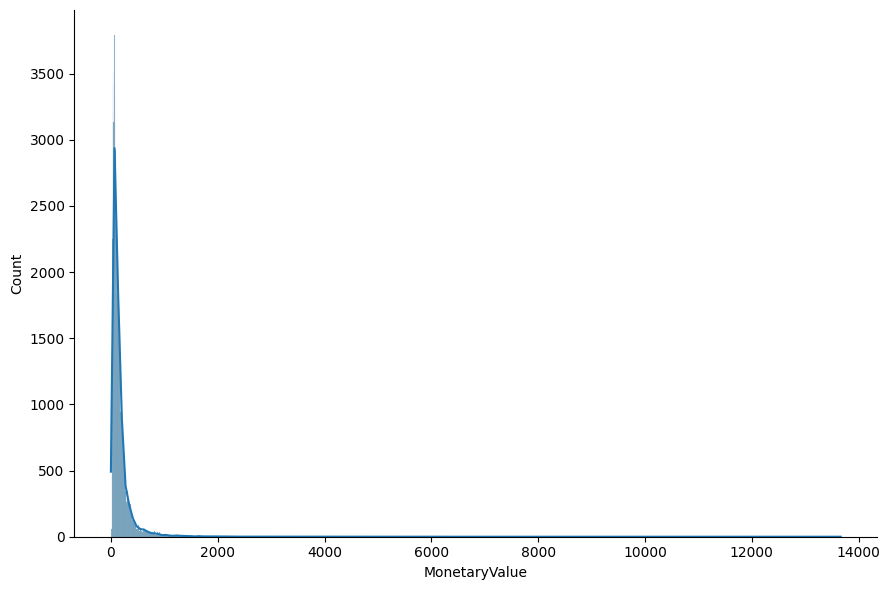

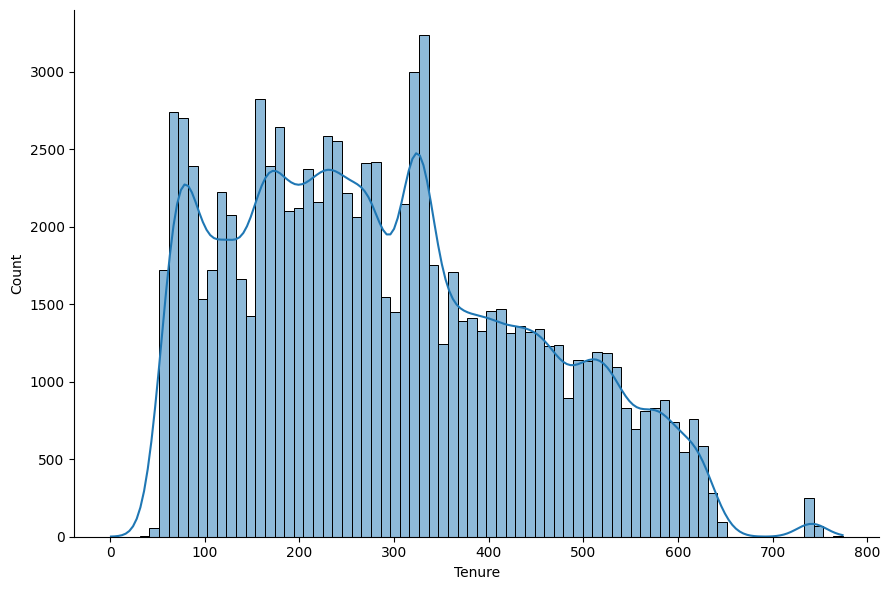

In [26]:
# verificando se as variavéis são simétricas

sns.displot(olist_clients['Recency'], kde=True,height=6,aspect=1.5)
sns.displot(olist_clients['Frequency'], kde=True,height=6,aspect=1.5)
sns.displot(olist_clients['MonetaryValue'], kde=True,height=6,aspect=1.5)
sns.displot(olist_clients['Tenure'], kde=True,height=6,aspect=1.5)
plt.show()

Transformção logarítmica do dataset para diminuir skeweness das varíaveis para se ajustar ao kmeans

In [27]:
# como transformação log so funciona em valores acima de 0, essas entradas devem ser descartadas
print(olist_clients[olist_clients['MonetaryValue']==0])

                                  Recency  Tenure  Frequency  MonetaryValue
customer_unique_id                                                         
4fa4365000c7090fcb8cad5713c6d3db       51      51          1            0.0
968fac81e2c44fb6c1e3ac2a45e6a102       45      45          1            0.0


In [28]:
olist_clients= olist_clients[olist_clients['MonetaryValue']>0]

In [29]:
olist_clients_log = np.log(olist_clients)

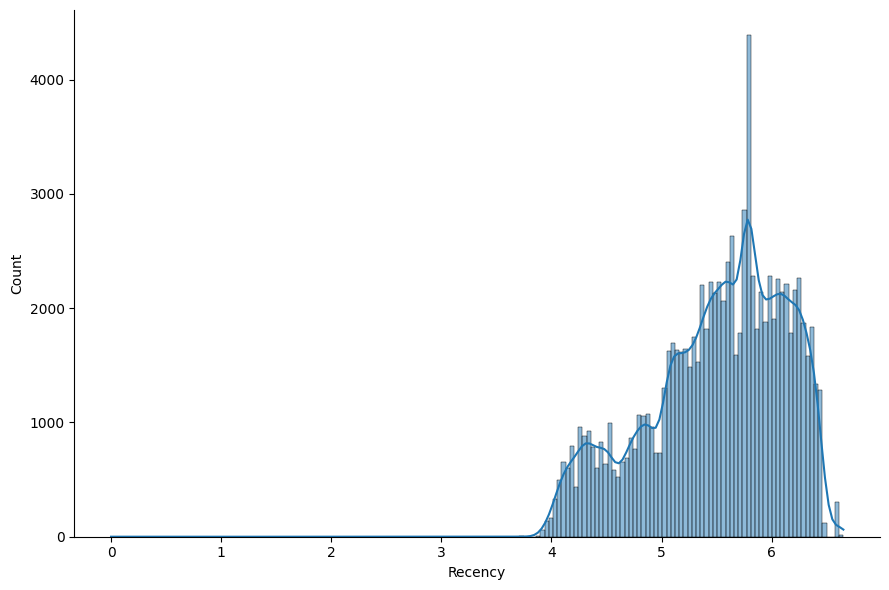

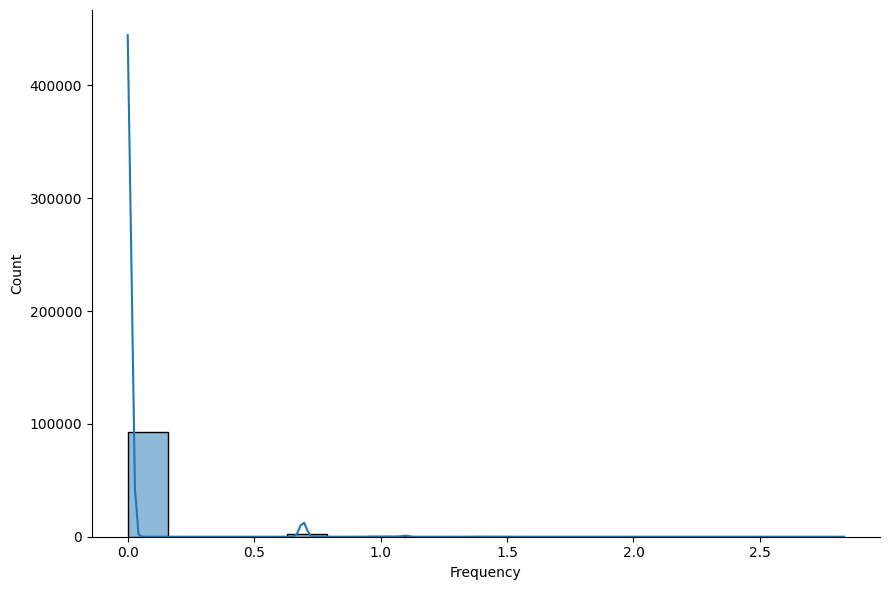

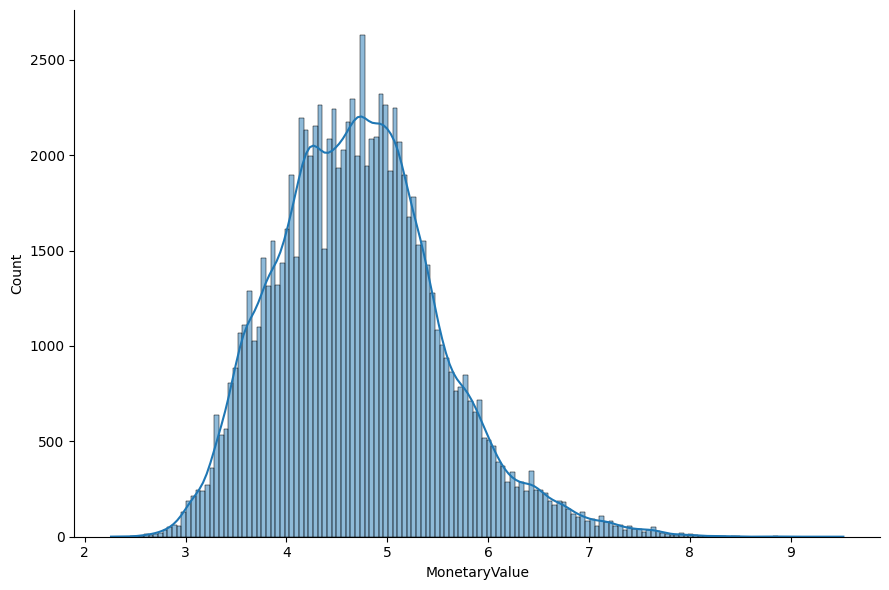

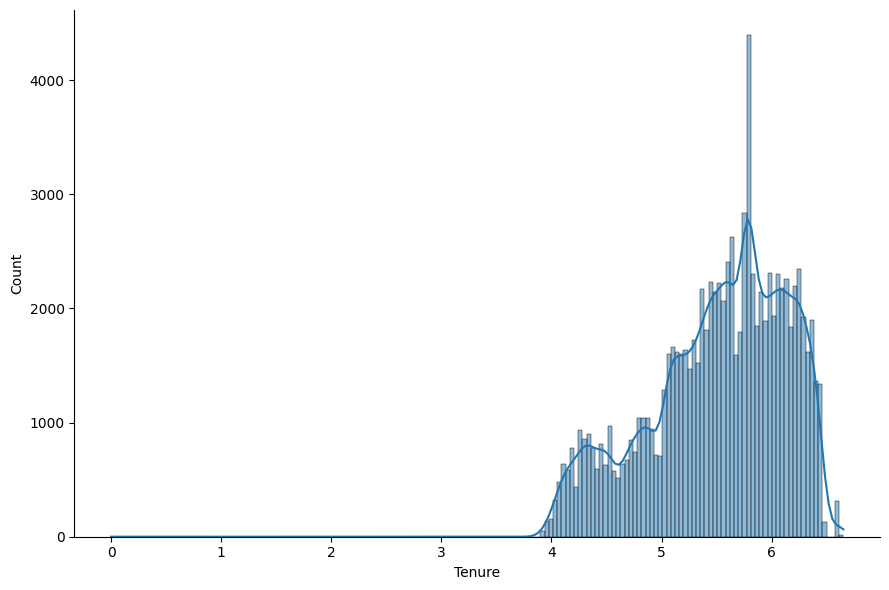

In [30]:
sns.displot(olist_clients_log['Recency'], kde=True,height=6,aspect=1.5)
sns.displot(olist_clients_log['Frequency'], kde=True,height=6,aspect=1.5)
sns.displot(olist_clients_log['MonetaryValue'], kde=True,height=6,aspect=1.5)
sns.displot(olist_clients_log['Tenure'], kde=True,height=6,aspect=1.5)
plt.show()

Transformando as varíaveis para um mesmo standard

In [31]:
scaler = StandardScaler()
olist_clients_normalized = scaler.fit_transform(olist_clients_log)

# Decidindo o número de clusters

Dependendo do  contexto empresarial, pode ser conhecido antecipadamente o número de clusters em que deseja segmentar os clientes. Mas, caso contrário, é necessário experimentar diferentes números de clusters para encontrar o ideal.


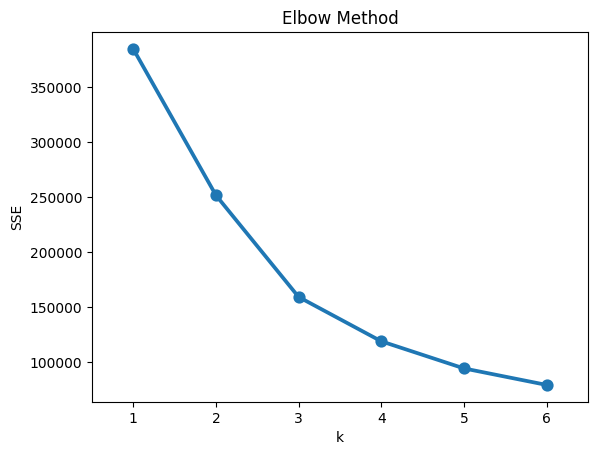

In [32]:
#implementação do elbow method
sse={}
for k in range(1,7):
  model = KMeans(n_clusters=k,random_state=12)
  model.fit(olist_clients_normalized)
  sse[k] = model.inertia_

#Plotando a soma dos erros quadrados para cada k
plt.title('Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()),y=list(sse.values()))
plt.show()


Segundo o gráfico o melhor valor de clusters seria de 3 a 4

In [33]:
model = KMeans(n_clusters=3,random_state=12)
model.fit(olist_clients_normalized)
# Adicionando os clusters no df original
olist_clients = olist_clients.assign(Cluster = model.labels_)

In [34]:
olist_clients

,Recency,Tenure,Frequency,MonetaryValue,Cluster
customer_unique_id,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,161,161,1,141.90,0
0000b849f77a49e4a4ce2b2a4ca5be3f,164,164,1,27.19,0
0000f46a3911fa3c0805444483337064,587,587,1,86.22,1
0000f6ccb0745a6a4b88665a16c9f078,371,371,1,43.62,1
0004aac84e0df4da2b147fca70cf8255,338,338,1,196.89,1
...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,497,497,1,2067.42,1
fffea47cd6d3cc0a88bd621562a9d061,312,312,1,84.58,1
ffff371b4d645b6ecea244b27531430a,618,618,1,112.46,1


# Analisando estatísticas de cada cluster

In [35]:
summaries = {
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':'mean',
    'Tenure':['mean','count']
}
olist_clients.groupby('Cluster').agg(summaries)

Recency Frequency MonetaryValue      Tenure       
               mean      mean          mean        mean  count
Cluster                                                       
0        130.694599  1.000000    167.800675  130.694599  32829
1        376.372990  1.000000    158.563078  376.372990  60267
2        269.568235  2.116116    314.989226  356.877211   2997

In [36]:
summaries = {
    'Recency':'median',
    'Frequency':'median',
    'MonetaryValue':'median',
    'Tenure':['median','count']
}
olist_clients.groupby('Cluster').agg(summaries)

Recency Frequency MonetaryValue Tenure       
         median    median        median median  count
Cluster                                              
0         131.0       1.0        109.42  131.0  32829
1         348.0       1.0        103.79  348.0  60267
2         249.0       2.0        225.84  351.0   2997

* Cluster 0 : Clientes que não gastam muito e estão a menos tempo com a empresa.
* Cluster 1 : Clientes que estão a muito tempo com a empresa, compram uma vez e não gastam muito e é o cluster mais numeroso
* Cluster 2 : Clientes que estão a muito tempo com a empresa, compram com maior frequência e também gastam mais e é o menor cluster em número.

# Visualizando os clusters

In [37]:
fig = px.scatter_3d(data_frame=olist_clients, x="Recency",
                    y="Frequency", z="MonetaryValue", color="Cluster", height=550
                )
fig.show()